# FaceMask_Detection_Image

### Importing the libraries

In [1]:
import cv2
import os 
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Data visulaization

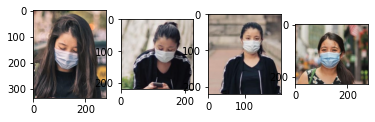

In [7]:
img1 = cv2.imread(r'Training_set/With_Mask/Yan_with_mask_10.jpeg')
img2 = cv2.imread(r'Training_set/With_Mask/Yan_with_mask_16.jpeg')
img3 = cv2.imread(r'Training_set/With_Mask/Yan_with_mask_14.jpeg')
img4 = cv2.imread(r'Training_set/With_Mask/Yan_with_mask_05.jpeg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

images = [img1, img2, img3, img4]

for i in range(4):
    plt.subplot(1, 4, i+1), plt.imshow(images[i], 'gray')

plt.show()

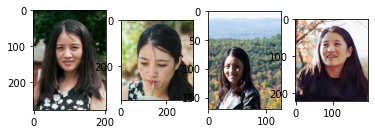

In [8]:
img1 = cv2.imread(r'Training_set/Without_Mask/Yan_without_mask_02.jpeg')
img2 = cv2.imread(r'Training_set/Without_Mask/Yan_without_mask_05.jpeg')
img3 = cv2.imread(r'Training_set/Without_Mask/Yan_without_mask_13.jpeg')
img4 = cv2.imread(r'Training_set/Without_Mask/Yan_without_mask_15.jpeg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

images = [img1, img2, img3, img4]

for i in range(4):
    plt.subplot(1, 4, i+1), plt.imshow(images[i], 'gray')

plt.show()

### Preprocessing the Training set

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 5,
                                                 class_mode = 'binary')

Found 29 images belonging to 2 classes.


### Preprocessing the Test set

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Test_set',
                                            target_size = (64, 64),
                                            batch_size = 5,
                                            class_mode = 'binary')

Found 8 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
cnn = tf.keras.models.Sequential() # sequence of layers

### Step 1 - Convolution

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#The rectified linear activation function or ReLU for short is a piecewise linear function that 
#will output the input directly if it is positive, otherwise, it will output zero. 
#It has become the default activation function for many types of neural networks because a 
#model that uses it is easier to train and often achieves better performance.

### Step 2 - Pooling

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # strides - shift

### Adding a second convolutional layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [15]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) # 128 hidden neurals

### Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # 1 neural, 1 or 0

## Part 3 - Training the CNN

### Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
6/6 [==============================] - 1s 105ms/step - loss: 0.7491 - accuracy: 0.4483 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 0s 60ms/step - loss: 0.6886 - accuracy: 0.5172 - val_loss: 0.6700 - val_accuracy: 0.5000
Epoch 3/50
6/6 [==============================] - 0s 65ms/step - loss: 0.6793 - accuracy: 0.5517 - val_loss: 0.6612 - val_accuracy: 0.6250
Epoch 4/50
6/6 [==============================] - 0s 52ms/step - loss: 0.6560 - accuracy: 0.5862 - val_loss: 0.6232 - val_accuracy: 0.6250
Epoch 5/50
6/6 [==============================] - 0s 59ms/step - loss: 0.5973 - accuracy: 0.7931 - val_loss: 0.5637 - val_accuracy: 0.7500
Epoch 6/50
6/6 [==============================] - 0s 57ms/step - loss: 0.5283 - accuracy: 0.6897 - val_loss: 0.5067 - val_accuracy: 0.7500
Epoch 7/50
6/6 [==============================] - 0s 56ms/step - loss: 0.4476 - accuracy: 0.8276 - val_loss: 0.4116 - val_accuracy: 0.7500
Epoch 8/50
6/6 [==========

In [20]:
training_set.class_indices

{'With_Mask': 0, 'Without_Mask': 1}

## Part 4 - Making a single prediction

In [21]:
test_image = image.load_img(r'Prediction/1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'without mask'
else:
  prediction = 'with mask'

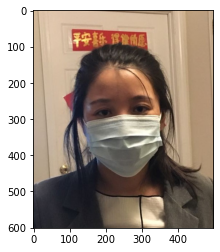

In [22]:
img = cv2.imread('Prediction/1.jpg', -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
print(prediction)

with mask


In [24]:
test_image = image.load_img(r'Prediction/12.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'without mask'
else:
  prediction = 'with mask'

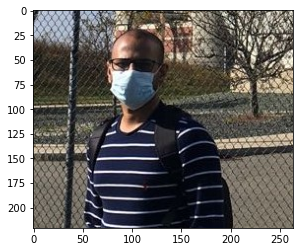

In [25]:
img = cv2.imread('Prediction/12.jpg', -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
print(prediction)

with mask


In [27]:
test_image = image.load_img(r'Prediction/7.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'without mask'
else:
  prediction = 'with mask'

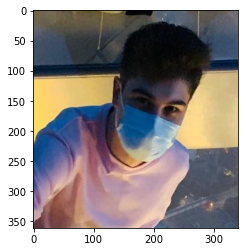

In [28]:
img = cv2.imread('Prediction/7.jpg', -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
print(prediction)

with mask


In [30]:
test_image = image.load_img(r'Prediction/13.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'without mask'
else:
  prediction = 'with mask'

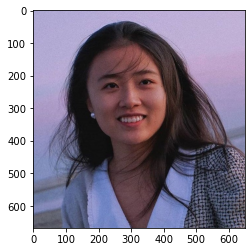

In [31]:
img = cv2.imread('Prediction/13.jpg', -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
print(prediction)

without mask


In [33]:
test_image = image.load_img(r'Prediction/10.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'without mask'
else:
  prediction = 'with mask'

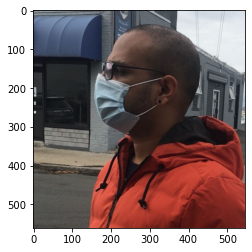

In [34]:
img = cv2.imread('Prediction/10.jpg', -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
print(prediction)

without mask
